In [1]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import torch

# Repository imports
from FFBrainNet import FFBrainNet
import FFLocalNet as ffln
from LocalNetBase import Options, UpdateScheme
from DataGenerator import random_halfspace_data
from train import *

## Train an FFBrainNet using regular gradient descent on all parameters:

In [2]:
# Generate some test data
N = 1000
X,y = random_halfspace_data(dim=4, n=2*N)
X_test = X[:N]
y_test = y[:N]
X_train = X[N:]
y_train = y[N:]

In [3]:
# Build a multi-layer, randomly connected, and capped feed-forward net
brain = FFBrainNet(n=4, m=2, l=4, w=20, p=0.5, cap=5, full_gd=True)

In [4]:
# Train the net using regular gradient descent on the params
losses = train_vanilla(X_train, y_train, brain, epochs=10, batch=100, lr=0.1)

INITIAL ACCURACY
Acc of class 0 :0.2048
Acc of class 1 :0.5797
epoch 0 Accuracy: 0.3930
Evaluating
Acc of class 0 :0.9337
Acc of class 1 :0.7490
epoch  1 Loss: 0.6230 Accuracy: 0.8410
Evaluating
Acc of class 0 :0.9518
Acc of class 1 :0.8924
epoch  2 Loss: 0.4629 Accuracy: 0.9220
Evaluating
Acc of class 0 :0.9739
Acc of class 1 :0.8964
epoch  3 Loss: 0.3964 Accuracy: 0.9350
Evaluating
Acc of class 0 :0.9799
Acc of class 1 :0.8865
epoch  4 Loss: 0.3810 Accuracy: 0.9330
Evaluating
Acc of class 0 :0.9759
Acc of class 1 :0.9263
epoch  5 Loss: 0.3715 Accuracy: 0.9510
Evaluating
Acc of class 0 :0.9598
Acc of class 1 :0.9303
epoch  6 Loss: 0.3699 Accuracy: 0.9450
Evaluating
Acc of class 0 :0.9578
Acc of class 1 :0.9402
epoch  7 Loss: 0.3643 Accuracy: 0.9490
Evaluating
Acc of class 0 :0.9558
Acc of class 1 :0.9542
epoch  8 Loss: 0.3593 Accuracy: 0.9550
Evaluating
Acc of class 0 :0.9739
Acc of class 1 :0.9661
epoch  9 Loss: 0.3505 Accuracy: 0.9700
Evaluating
Acc of class 0 :0.9799
Acc of class 1

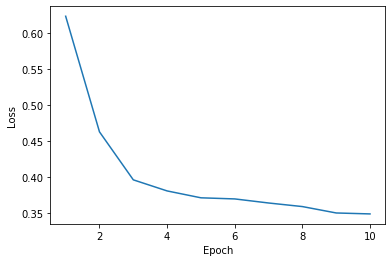

Last outer epoch loss: 0.34917054599717195


In [5]:
# Plot the learning curve
plt.plot(range(1, len(losses)+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print('Last outer epoch loss:', losses[-1])

In [6]:
# Evaluate on test data
acc = evaluate(X_test, y_test, 2, brain)
print('Test Accuracy:', acc)

Acc of class 0 :0.9575
Acc of class 1 :0.9348
Test Accuracy: 0.946


## Meta-Learn Plasticity Rules on halfspace data:

In [4]:
# Generate data
dimension = 4
n = 1000
X, y = random_halfspace_data(dim = dimension, n = 2*n)
X_test = X[:n]
y_test = y[:n]
X = X[n:]
y = y[n:]

In [5]:
# Set options to meta-learn hidden layer plasticity rules, while using regular GD on input and output weights directly
opts = Options(use_graph_rule=True,
               gd_graph_rule=True,
               gd_input=True,
               gd_output=True)
scheme = UpdateScheme()

In [6]:
# Instantiate an FFLocalNet with 2 hidden layers
brain = ffln.FFLocalNet(n=4, m=2, l=2, w=100, p=0.5, cap=50, options=opts, update_scheme=scheme)

# Print initial rule
print('brain hidden_layer_rule:')
print(brain.get_hidden_layer_rule())  # 2 x (cap+1) x 2, randomly initialized

brain hidden_layer_rule:
tensor([[[ 0.1272,  0.6186,  1.4966, -0.8179, -0.4285,  1.4912,  0.4211,
          -0.3925, -0.9600, -1.0165,  1.0976, -0.8001,  1.8335, -1.2752,
          -1.5831, -0.0807,  0.4636,  0.3627,  0.1098,  0.0579, -0.8305,
          -0.6042,  0.9562,  1.1020,  1.0578, -1.7460,  0.8728,  0.6728,
          -0.4704,  0.3001,  1.3057, -0.1055, -1.1089,  0.2735, -1.0116,
           0.5591,  1.3376, -0.8406, -0.6049, -0.8716, -1.6700, -1.6369,
          -0.7923,  2.0578,  1.0337, -1.1413, -0.5163, -0.0418, -0.0397,
           0.2974, -0.1066],
         [ 1.6397,  0.2994,  0.8760,  0.8643,  0.1154, -0.2567, -0.0950,
          -0.9921,  1.3227, -0.2249, -2.0003,  0.1151, -0.0690, -0.0954,
          -1.1725, -0.9620, -1.6229,  1.4751, -1.0024,  1.0481,  0.0038,
          -0.1029,  0.4480, -0.1376,  1.4527,  2.2590,  0.9077, -0.3707,
           0.1350, -0.5661, -1.9689, -1.2011, -1.0257,  0.6140,  0.5461,
          -0.0167, -0.5623, -0.4137, -0.9917, -0.7018, -1.1861,  0.682

In [7]:
# Meta-Learn a single plasticity rule between the two hidden layers
losses, train_accuracies, test_accuracies = train_local_rule(
    X,                      # Training Examples
    y,                      # Training Labels
    brain,                  # The FFBrainNet
    rule_epochs = 100,      # Number of times to run through the data
    epochs = 1,             # Number of time to run through a single batch for a single training pass
    batch = 100,            # Number of examples in a batch.
    lr = 1e-2,              # Learning Rate
    X_test = X_test,
    y_test = y_test,
    verbose = True)         # Evaluate network on test/train data each epoch

Starting Train
Outer epoch  1
Acc of class 0 :0.7076
Acc of class 1 :0.3405
Train Accuracy: 0.5200
Acc of class 0 :0.7530
Acc of class 1 :0.2968
Test Accuracy: 0.5240
Current loss: 0.809036715804692
Mean loss so far: 0.809036715804692
Outer epoch  2
Acc of class 0 :1.0000
Acc of class 1 :0.0000
Train Accuracy: 0.4890
Acc of class 0 :1.0000
Acc of class 1 :0.0000
Test Accuracy: 0.4980
Current loss: 0.7903353699728749
Mean loss so far: 0.7996860428887835
Outer epoch  3
Acc of class 0 :0.1861
Acc of class 1 :0.9061
Train Accuracy: 0.5540
Acc of class 0 :0.2169
Acc of class 1 :0.8904
Test Accuracy: 0.5550
Current loss: 0.7690800693372637
Mean loss so far: 0.7894840517049436
Outer epoch  4
Acc of class 0 :0.0000
Acc of class 1 :1.0000
Train Accuracy: 0.5110
Acc of class 0 :0.0000
Acc of class 1 :1.0000
Test Accuracy: 0.5020
Current loss: 0.7967663437556217
Mean loss so far: 0.7913046247176131
Outer epoch  5
Acc of class 0 :0.3354
Acc of class 1 :0.5029
Train Accuracy: 0.4210
Acc of class 0 

In [8]:
# Show updated hidden layer rule
print('brain hidden_layer_rule:')
print(brain.get_hidden_layer_rule())

brain hidden_layer_rule:
tensor([[[-5.0021e-25, -5.0766e-23,  1.5364e-14,  4.3464e-23, -1.3280e-23,
           1.2204e-14, -3.9282e-24,  1.0884e-23, -3.1473e-22, -1.9941e-20,
           5.6683e-20, -4.6308e-22,  2.3950e-05,  6.2123e-05,  1.5387e-03,
           1.1068e-03,  2.2322e-03,  2.3076e-02,  4.6745e-02,  1.1138e-01,
           1.9266e-01,  2.9522e-01,  3.4431e-01,  2.9215e-01,  2.2338e-01,
           1.3974e-01,  6.9222e-02,  3.3328e-02,  1.3540e-02,  7.7760e-03,
           3.5771e-03,  1.5041e-03,  1.4883e-03,  2.4678e-04,  2.9369e-04,
           3.7960e-04,  1.9834e-05,  1.0497e-19,  2.6182e-19, -1.5571e-19,
          -1.2351e-12,  1.3239e-12, -2.5761e-22,  2.3676e-07,  2.3196e-20,
           2.1770e-20, -2.0595e-23,  6.1889e-25, -4.5740e-25, -3.7359e-24,
          -1.8127e-24],
         [-1.3230e-12, -6.6751e-24,  1.0954e-21,  1.2159e-21, -1.7564e-24,
           3.9694e-25, -1.4193e-24,  8.7211e-21,  2.8576e-17,  3.8839e-25,
          -8.9575e-08, -2.0104e-24,  6.9499e-25,  1

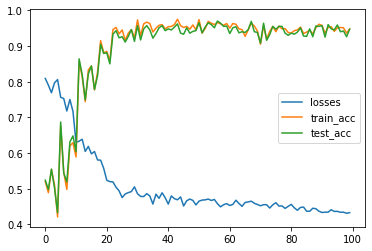

Last outer epoch loss: 0.4330131993185448
Last outer epoch train_accuracies: [0.948]
Last outer epoch test_accuracies: [0.947]


In [11]:
# Plot learning curves
plt.plot(losses, label='losses')
plt.plot(np.reshape(train_accuracies, -1), label='train_acc')
plt.plot(np.reshape(test_accuracies, -1), label='test_acc')
plt.legend()
plt.show()
print('Last outer epoch loss:', losses[-1])
print('Last outer epoch train_accuracies:', train_accuracies[-1])
print('Last outer epoch test_accuracies:', test_accuracies[-1])

## Train with the already learned rules on a different halfspace:

In [19]:
# Generate data.
dimension = 4
n = 5000
X, y = random_halfspace_data(dim = dimension, n = 3*n)
X_test = X[:n]
y_test = y[:n]
X = X[n:]
y = y[n:]

In [20]:
# NOTE: This method trains only once over all examples, updating the stats every 500 steps.
train_accuracies, test_accuracies = train_given_rule(
    X,                      # Training Examples
    y,                      # Training Labels
    brain,                  # The FFBrainNet
    X_test = X_test,
    y_test = y_test,
    verbose = True)         # Evaluate the network every 500 samples

Train on 0  examples.
Acc of class 0 :0.0000
Acc of class 1 :1.0000
Train Accuracy: 0.5060
Acc of class 0 :0.0000
Acc of class 1 :1.0000
Test Accuracy: 0.5022
Train on 500  examples.
Acc of class 0 :0.7709
Acc of class 1 :0.2255
Train Accuracy: 0.4949
Acc of class 0 :0.7738
Acc of class 1 :0.2346
Test Accuracy: 0.5030
Train on 1000  examples.
Acc of class 0 :0.8648
Acc of class 1 :0.1626
Train Accuracy: 0.5095
Acc of class 0 :0.8730
Acc of class 1 :0.1673
Test Accuracy: 0.5186
Train on 1500  examples.
Acc of class 0 :0.9354
Acc of class 1 :0.0858
Train Accuracy: 0.5055
Acc of class 0 :0.9373
Acc of class 1 :0.0773
Test Accuracy: 0.5054
Train on 2000  examples.
Acc of class 0 :0.9672
Acc of class 1 :0.0488
Train Accuracy: 0.5025
Acc of class 0 :0.9675
Acc of class 1 :0.0422
Test Accuracy: 0.5028
Train on 2500  examples.
Acc of class 0 :0.9789
Acc of class 1 :0.0287
Train Accuracy: 0.4981
Acc of class 0 :0.9827
Acc of class 1 :0.0271
Test Accuracy: 0.5028
Train on 3000  examples.
Acc of 

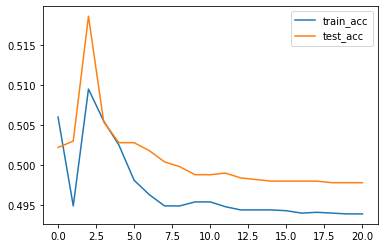

In [21]:
# Plot learning curves
plt.plot(np.reshape(train_accuracies, -1), label='train_acc')
plt.plot(np.reshape(test_accuracies, -1), label='test_acc')
plt.legend()
plt.show()